# Machine Learning Prediction of Vcells from our DFT Simulated Nanocages

In [1]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, make_scorer, mean_squared_error

In [3]:
# reading Excel dataset from DFT simulated nanocages
Battery_ML = pd.read_excel('ThankGod_C_Egemonye_and_Tomsmith_O_Unimuke_Ge12C12_Si12C12_Battery.xlsx')
Battery_ML

,Nanocage,Eg (eV),∆Ecell (kcal/mol),Vcell (V)
0,Ge12C12,2.01,-1.39,0.06
1,Si12C12,2.72,-34.36,1.49
2,O-Ge12C12,1.85,6.22,-0.27
3,O-Si12C12,2.71,-3.23,0.14
4,Se-Ge12C12,1.16,-2.54,0.11
5,Se-Si12C12,1.85,-2.76,0.12


In [4]:
# statistical description of our datasets
Battery_ML.describe()

,Eg (eV),∆Ecell (kcal/mol),Vcell (V)
count,6.000000,6.000000,6.000000
mean,2.050000,-6.343333,0.275000
std,0.592992,14.172543,0.614646
min,1.160000,-34.360000,-0.270000
25%,1.850000,-3.112500,0.072500
50%,1.930000,-2.650000,0.115000
75%,2.535000,-1.677500,0.135000
max,2.720000,6.220000,1.490000


In [5]:
# Selecting X variable
X= Battery_ML.drop(columns = ['Nanocage', 'Vcell (V)']).values
X

array([[  2.01,  -1.39],
       [  2.72, -34.36],
       [  1.85,   6.22],
       [  2.71,  -3.23],
       [  1.16,  -2.54],
       [  1.85,  -2.76]])

In [6]:
# Selecting Y variable
Y = Battery_ML['Vcell (V)'].values
Y

array([ 0.06,  1.49, -0.27,  0.14,  0.11,  0.12])

# Splitting Datasets into Training and Testing

In [7]:
# Splitting of dataset into training and testing: 80% for training and 20 for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=18)

In [8]:
X_train

array([[  2.72, -34.36],
       [  2.01,  -1.39],
       [  2.71,  -3.23],
       [  1.85,   6.22]])

In [9]:
Y_train

array([ 1.49,  0.06,  0.14, -0.27])

In [10]:
X_test

array([[ 1.85, -2.76],
       [ 1.16, -2.54]])

In [11]:
Y_test

array([0.12, 0.11])

# Performing Cross-Validation on Regression Algorithms

• K-fold cross-validation was performed on our regression algorithms to ensure their generalization on unseen data. 

• Cross_val_score was used to evaluate accuracy of the regression algorithms across k-folds, utilizing r2_score and root mean square error (RMSE) as scoring function.

In [ ]:
# Creating instances of regression models
models = []
models.append(('Linear_Regression', LinearRegression()))
models.append(('Lasso', Lasso(alpha=0.001)))
models.append(('Ridge', Ridge(alpha=0.5)))
models.append(('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.1)))

# evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=2)
    cross_validation_r2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(r2_score))
    cross_validation_rmse = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(mean_squared_error,
                                                                                    greater_is_better=False, squared=False))
    results.append((cross_validation_r2.tolist(), cross_validation_rmse.tolist()))
    names.append(name)
    final = "%s: R2 = %f (%f), RMSE = %f " % (name, cross_validation_r2.mean(), cross_validation_r2.std(), cross_validation_rmse.mean())
                                                                                                          
    print(final)

# Predicting Vcells of the Nanocages

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

# Creating instances of the regression models
models = [('Linear', LinearRegression()), ('Lasso', Lasso(alpha=0.001)),('Ridge', Ridge(alpha=0.5)),
          ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.1))]

# Evaluating each model
Y_predicted_all = {}
for name, model in models:
    kfold = KFold(n_splits=2)
    Y_predicted = []
    for train, test in kfold.split(X_train, Y_train):
        X_train_fold, X_test_fold = X_train[train], X_train[test]
        Y_train_fold, Y_test_fold = Y_train[train], Y_train[test]
        model.fit(X_train_fold, Y_train_fold)
        predicted_values = model.predict(X_test_fold)
        Y_predicted.append(predicted_values)
    Y_predicted_all[name] = Y_predicted

# Printing predicted Vcells for each regression model
for name in Y_predicted_all:
    print(f"{name} predictions: {Y_predicted_all[name]}")

Linear predictions: [array([1.47955906, 0.05808387]), array([ 0.1404224 , -0.27006311])]
Lasso predictions: [array([1.48900775, 0.06004009]), array([ 0.13985977, -0.26997806])]
Ridge predictions: [array([1.46259373, 0.05673193]), array([ 0.14100537, -0.26910303])]
ElasticNet predictions: [array([1.46837234, 0.0583797 ]), array([ 0.1405549 , -0.26883439])]


# Plotting ML-Predicted Vcell Vs DFT-Predicted Vcell

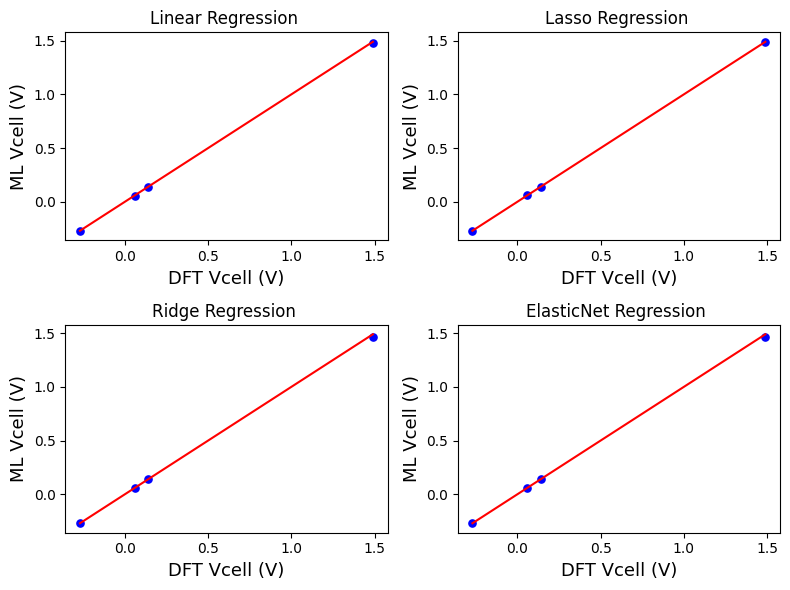

In [14]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
# Iterate through the models and plot the regression
for i, (name, model) in enumerate(models):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Flatten the Y_predicted values
    Y_pred = [item for sublist in Y_predicted_all[name] for item in sublist]
    
    # Plotting the regression
    ax.scatter(Y_train, Y_pred, s=27, c='blue')
    ax.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], c='red', linewidth=1.5)
    ax.set_title(f"{name} Regression ")
    ax.set_xlabel("DFT Vcell (V)", size=13)
    ax.set_ylabel("ML Vcell (V)", size=13)

plt.tight_layout()
plt.savefig('ThankGod_C_Egemonye_and_Tomsmith_O_Unimuke_Ge12C12_Si12C12_Battery.png', dpi=600)
plt.show()